In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
df = pd.read_csv('StudentsPerformance.csv')
df['total'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


Question one: Choose one variable and plot that variable different ways.

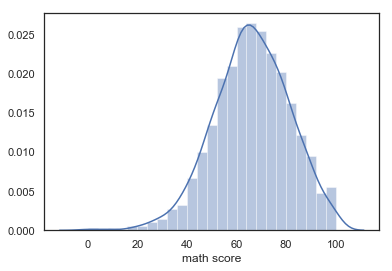

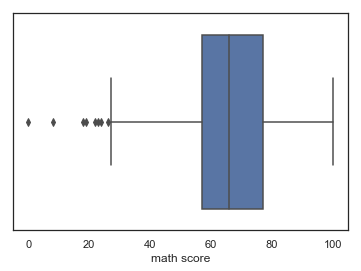

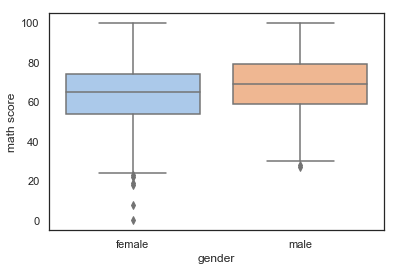

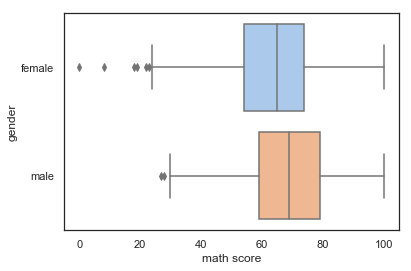

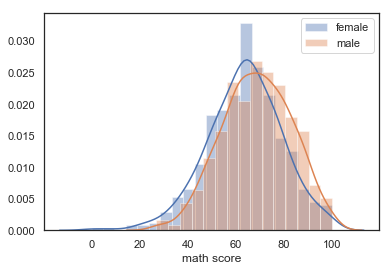

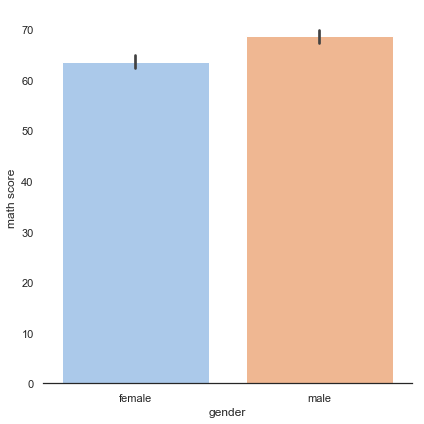

In [111]:
#Making a histogram 
sns.distplot(df['math score'])
plt.show()

#boxplot
ax = sns.boxplot(df['math score']) 
plt.show()

#Boxplot looking at math scores by gender
ax = sns.boxplot(x='gender',y='math score',data=df,palette='pastel')
plt.show()

#Boxplot looking at gender by math scores
ax = sns.boxplot(x='math score', y='gender', data=df, palette='pastel')
plt.show()

#Overlapping distribution plot
ax = sns.distplot(female['math score'], label='female')
ax = sns.distplot(male['math score'], label='male')
plt.legend()
plt.show()

#Bar plot
g = sns.factorplot(x="gender", y="math score", data=df,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
plt.show()

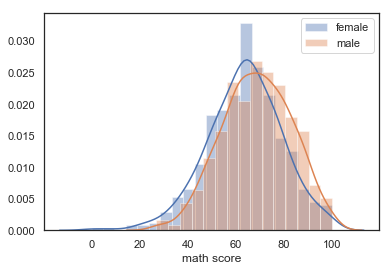

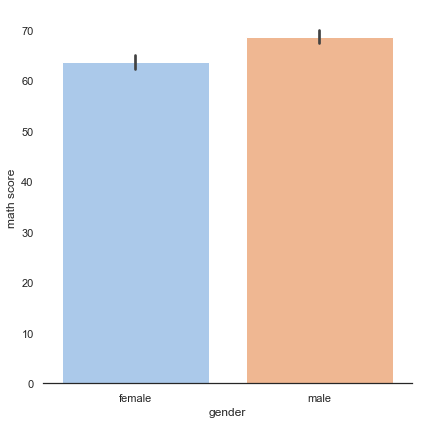

In [112]:
#Now looking both at math scores and gender
female = df.loc[lambda df: df['gender'] == "female", :]
male = df.loc[lambda df: df['gender'] == "male", :]

ax = sns.distplot(female['math score'], label='female')
ax = sns.distplot(male['math score'], label='male')
plt.legend()
plt.show()


g = sns.factorplot(x="gender", y="math score", data=df,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
plt.show()

2. Choose two continuous variables, and plot them three different ways.

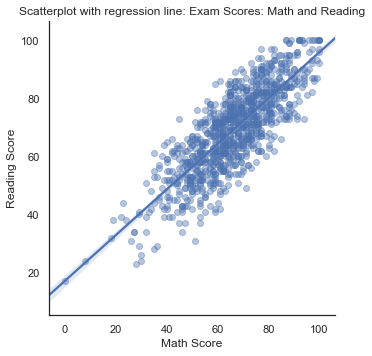

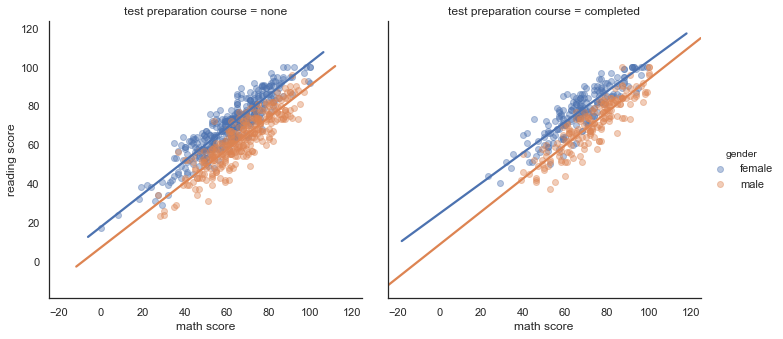

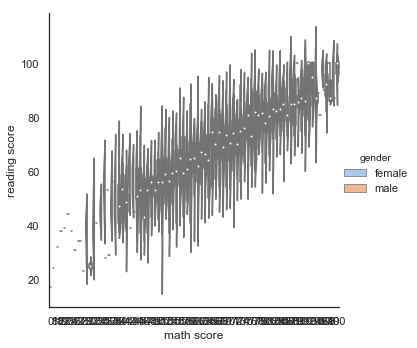

In [120]:
#Look at the relationship between the reading score and math score

g = sns.lmplot(y='reading score', 
               x='math score',
               data=df, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Reading Score")
g.set_xlabels("Math Score")
plt.title('Scatterplot with regression line: Exam Scores: Math and Reading')
plt.show()

sns.set(style="white")

g = sns.lmplot(y='reading score', 
               x='math score',
               hue='gender',
               data=df, # Data.
               col='test preparation course',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
#g.set_ylabels("Tips")
#g.set_xlabels("Total Bill")
#plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

sns.catplot(x="math score", y="reading score", hue="gender",
            kind="violin", split=True, data=df, palette="pastel");
plt.show()

3. Choose one continuous variable and one categorical variable, and plot them different ways.

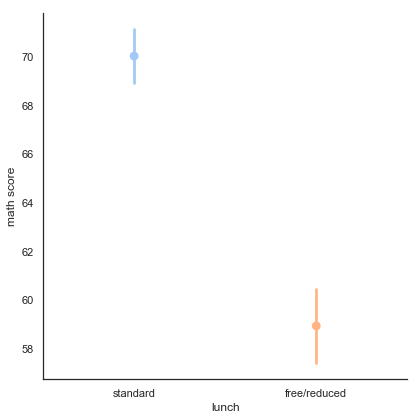

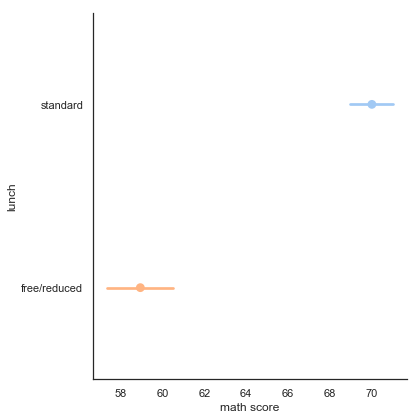

In [115]:
g = sns.factorplot(x="lunch", y="math score", data=df,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
plt.show()

g = sns.factorplot(x="math score", y="lunch", data=df,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
plt.show()

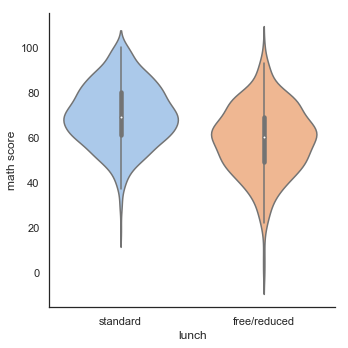

In [116]:
sns.catplot(x="lunch", y="math score", 
            kind="violin", split=True, data=df, palette="pastel")

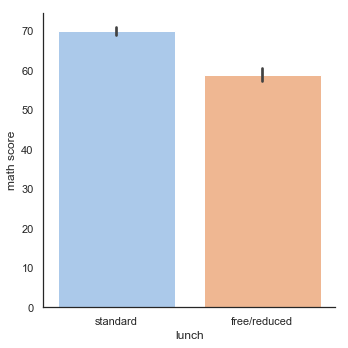

In [117]:
sns.catplot(x="lunch", y="math score",
            kind="bar", data=df, palette="pastel")

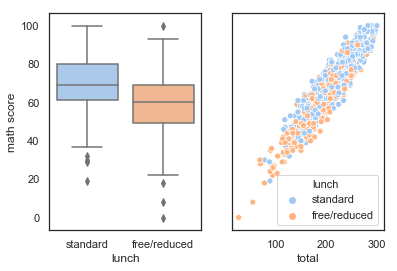

In [118]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="lunch", y="math score", data=df, ax=axes[0], palette="pastel")
sns.scatterplot(x="total", y="math score", hue="lunch", data=df, ax=axes[1], palette="pastel")